Data from
https://github.com/henriquepgomide/caRtola

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv('raw_datasets/dados_agregados_limpos.csv')

In [3]:
df_raw = df_raw[df_raw.ano == 2017]

In [4]:
df_raw.columns

Index(['A', 'Apelido', 'AtletaID', 'CA', 'CV', 'ClubeID', 'DD', 'DP', 'FC',
       'FD', 'FF', 'FS', 'FT', 'G', 'GC', 'GS', 'I', 'Jogos', 'PE', 'PP',
       'Participou', 'Pontos', 'PontosMedia', 'Posicao', 'Preco',
       'PrecoVariacao', 'RB', 'Rodada', 'SG', 'Status', 'ano', 'avg.A',
       'avg.A.l05', 'avg.CA', 'avg.CV.l05', 'avg.DD', 'avg.DD.l05', 'avg.DP',
       'avg.DP.l05', 'avg.FC', 'avg.FC.l05', 'avg.FD', 'avg.FD.l05', 'avg.FF',
       'avg.FF.l05', 'avg.FS', 'avg.FS.l05', 'avg.FT', 'avg.FT.l05', 'avg.G',
       'avg.G.l05', 'avg.GC', 'avg.GC.l05', 'avg.GS', 'avg.GS.l05', 'avg.I',
       'avg.I.l05', 'avg.PE', 'avg.PE.l05', 'avg.PP', 'avg.PP.l05',
       'avg.Points', 'avg.RB', 'avg.RB.l05', 'avg.SG', 'avg.SG.l05',
       'avg.last05', 'away.score.x', 'dia', 'home.attack', 'home.defend',
       'home.score.x', 'mes', 'pred.away.score', 'pred.home.score',
       'risk_points', 'variable'],
      dtype='object')

In [5]:
df_raw = df_raw[['AtletaID', 'ClubeID', 'Posicao', 'Rodada', 'avg.A',
       'avg.CA','avg.DD', 'avg.DP', 'avg.FC', 'avg.FD', 'avg.FF',
       'avg.FS', 'avg.FT', 'avg.G', 'avg.GC',  'avg.GS', 'avg.I',
       'avg.PE', 'avg.PP', 'avg.RB', 'avg.SG']]

In [6]:
df_raw.shape

(9346, 21)

In [7]:
df_raw.head()

,AtletaID,ClubeID,Posicao,Rodada,avg.A,avg.CA,avg.DD,avg.DP,avg.FC,avg.FD,...,avg.FS,avg.FT,avg.G,avg.GC,avg.GS,avg.I,avg.PE,avg.PP,avg.RB,avg.SG
29,36540,Flamengo,zag,4,0.008333,0.083333,0.0,0.0,0.375000,0.066667,...,0.200000,0.0,0.0,0.0,0.0,0.008333,0.533333,0.0,0.375000,0.166667
30,36540,Flamengo,zag,5,0.008264,0.090909,0.0,0.0,0.371901,0.074380,...,0.206612,0.0,0.0,0.0,0.0,0.008264,0.537190,0.0,0.388430,0.165289
31,36540,Flamengo,zag,6,0.016393,0.090164,0.0,0.0,0.368852,0.073770,...,0.213115,0.0,0.0,0.0,0.0,0.008197,0.557377,0.0,0.409836,0.163934
32,36540,Flamengo,zag,8,0.016129,0.088710,0.0,0.0,0.370968,0.072581,...,0.225806,0.0,0.0,0.0,0.0,0.008065,0.556452,0.0,0.403226,0.161290
33,36540,Flamengo,zag,9,0.016000,0.096000,0.0,0.0,0.376000,0.072000,...,0.224000,0.0,0.0,0.0,0.0,0.008000,0.552000,0.0,0.408000,0.160000


In [8]:
df_raw.describe()

,AtletaID,Rodada,avg.A,avg.CA,avg.DD,avg.DP,avg.FC,avg.FD,avg.FF,avg.FS,avg.FT,avg.G,avg.GC,avg.GS,avg.I,avg.PE,avg.PP,avg.RB,avg.SG
count,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000
mean,72953.993259,20.668521,0.036197,0.087007,0.054188,0.001009,0.630262,0.137232,0.194876,0.616189,0.010550,0.052294,0.000932,0.044467,0.077312,1.311220,0.001432,0.551675,0.067032
std,18168.753946,10.241227,0.044516,0.066098,0.236938,0.005720,0.429689,0.146790,0.170492,0.493102,0.022896,0.072685,0.004877,0.194705,0.118544,0.873072,0.005636,0.454475,0.103593
min,36540.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62974.000000,12.000000,0.000000,0.038462,0.000000,0.000000,0.330189,0.028571,0.058824,0.244898,0.000000,0.000000,0.000000,0.000000,0.000000,0.627565,0.000000,0.206897,0.000000
50%,78407.000000,21.000000,0.020833,0.080000,0.000000,0.000000,0.580645,0.087956,0.158909,0.500000,0.000000,0.022727,0.000000,0.000000,0.032258,1.179296,0.000000,0.466667,0.000000
75%,86973.750000,30.000000,0.056566,0.123457,0.000000,0.000000,0.865672,0.212121,0.291667,0.875000,0.014788,0.077922,0.000000,0.000000,0.094340,1.853911,0.000000,0.767794,0.132323
max,100843.000000,38.000000,0.400000,1.000000,2.000000,0.076923,3.200000,1.333333,1.333333,2.785714,1.000000,0.777778,0.166667,1.857143,1.000000,5.833333,0.090909,3.071429,1.000000


In [9]:
# dimensions = ['avg.A', 'avg.A.l05', 'avg.CA', 'avg.CV.l05', 'avg.DD', 'avg.DD.l05', 'avg.DP',
#                'avg.DP.l05', 'avg.FC', 'avg.FC.l05', 'avg.FD', 'avg.FD.l05', 'avg.FF',
#                'avg.FF.l05', 'avg.FS', 'avg.FS.l05', 'avg.FT', 'avg.FT.l05', 'avg.G',
#                'avg.G.l05', 'avg.GC', 'avg.GC.l05', 'avg.GS', 'avg.GS.l05', 'avg.I',
#                'avg.I.l05', 'avg.PE', 'avg.PE.l05', 'avg.PP', 'avg.PP.l05',
#                'avg.RB', 'avg.RB.l05', 'avg.SG', 'avg.SG.l05', 'avg.last05']
dimensions = ['avg.A', 'avg.CA','avg.DD', 'avg.DP', 'avg.FC', 'avg.FD', 'avg.FF',
       'avg.FS', 'avg.FT', 'avg.G', 'avg.GC',  'avg.GS', 'avg.I',
       'avg.PE', 'avg.PP', 'avg.RB', 'avg.SG']
len(dimensions)

17

In [10]:
def format_athlete(df):
    first_valid = df.iloc[0].copy()
    new_index = pd.Index(np.arange(1,39), name="Rodada")
    df = df.set_index('Rodada').reindex(new_index)
    if np.isnan(df.iloc[0].AtletaID):
        first = first_valid.copy()
        for dim in dimensions:
            first[dim] = 0.0

        first.Rodada = 1
        df.loc[1] = first
        
    df = df.fillna(method='ffill') 
    df['AtletaID'].astype('int')
    df['Rodada'] = df.index
    df['Posicao'] = first_valid['Posicao']
    df = df[df.Rodada > 19]
    return df

In [11]:
df_all = pd.DataFrame(columns=df_raw.columns)
df_all

,AtletaID,ClubeID,Posicao,Rodada,avg.A,avg.CA,avg.DD,avg.DP,avg.FC,avg.FD,...,avg.FS,avg.FT,avg.G,avg.GC,avg.GS,avg.I,avg.PE,avg.PP,avg.RB,avg.SG


In [12]:
for i, df in df_raw.groupby('AtletaID'):
    df_all = df_all.append(format_athlete(df), ignore_index=True)

In [13]:
df_all['id'] = df_all['Posicao'].str.cat(df_all['AtletaID'].astype(int).astype(str), sep='-')
df_all


,AtletaID,ClubeID,Posicao,Rodada,avg.A,avg.CA,avg.DD,avg.DP,avg.FC,avg.FD,...,avg.FT,avg.G,avg.GC,avg.GS,avg.I,avg.PE,avg.PP,avg.RB,avg.SG,id
0,36540.0,Flamengo,zag,20,0.022388,0.089552,0.0,0.0,0.365672,0.074627,...,0.007463,0.000000,0.0,0.0,0.007463,0.552239,0.0,0.402985,0.149254,zag-36540
1,36540.0,Flamengo,zag,21,0.022388,0.089552,0.0,0.0,0.365672,0.074627,...,0.007463,0.000000,0.0,0.0,0.007463,0.552239,0.0,0.402985,0.149254,zag-36540
2,36540.0,Flamengo,zag,22,0.021739,0.086957,0.0,0.0,0.355072,0.072464,...,0.007246,0.000000,0.0,0.0,0.007246,0.543478,0.0,0.398551,0.152174,zag-36540
3,36540.0,Flamengo,zag,23,0.021739,0.086957,0.0,0.0,0.355072,0.072464,...,0.007246,0.000000,0.0,0.0,0.007246,0.543478,0.0,0.398551,0.152174,zag-36540
4,36540.0,Flamengo,zag,24,0.021739,0.086957,0.0,0.0,0.355072,0.072464,...,0.007246,0.000000,0.0,0.0,0.007246,0.543478,0.0,0.398551,0.152174,zag-36540
5,36540.0,Flamengo,zag,25,0.021739,0.086957,0.0,0.0,0.355072,0.072464,...,0.007246,0.000000,0.0,0.0,0.007246,0.543478,0.0,0.398551,0.152174,zag-36540
6,36540.0,Flamengo,zag,26,0.021739,0.086957,0.0,0.0,0.355072,0.072464,...,0.007246,0.000000,0.0,0.0,0.007246,0.543478,0.0,0.398551,0.152174,zag-36540
7,36540.0,Flamengo,zag,27,0.020979,0.083916,0.0,0.0,0.342657,0.069930,...,0.006993,0.000000,0.0,0.0,0.006993,0.538462,0.0,0.398601,0.146853,zag-36540
8,36540.0,Flamengo,zag,28,0.020979,0.083916,0.0,0.0,0.342657,0.069930,...,0.006993,0.000000,0.0,0.0,0.006993,0.538462,0.0,0.398601,0.146853,zag-36540
9,36540.0,Flamengo,zag,29,0.020690,0.089655,0.0,0.0,0.358621,0.068966,...,0.006897,0.000000,0.0,0.0,0.006897,0.531034,0.0,0.400000,0.144828,zag-36540


In [22]:
!mkdir datasets/cartola
!mkdir datasets/cartolastd

In [15]:
header = dimensions.copy()
header.insert(0, 'id')

In [23]:
for i, df in df_all.groupby('Rodada'):
    print(i)
    df.sort_values('id').to_csv('datasets/cartola/cartola-{}.csv'.format(int(i-20)),
                                    index_label=False, columns=header, header=header, index=False)

# Standardized version
for dim in dimensions:
    df_all[dim] = (df_all[dim] - df_all[dim].mean()) / df_all[dim].std()
    
for i, df in df_all.groupby('Rodada'):
    df.sort_values('id').to_csv('datasets/cartolastd/cartolastd-{}.csv'.format(int(i-20)),
                                    index_label=False, columns=header, header=header, index=False)

    
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


# Only games from 2nd turn

In [17]:
header

['id',
 'avg.A',
 'avg.CA',
 'avg.DD',
 'avg.DP',
 'avg.FC',
 'avg.FD',
 'avg.FF',
 'avg.FS',
 'avg.FT',
 'avg.G',
 'avg.GC',
 'avg.GS',
 'avg.I',
 'avg.PE',
 'avg.PP',
 'avg.RB',
 'avg.SG']

In [18]:
# a = df_raw[df.AtletaID == 78715].copy()
# format_athlete(a)

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt

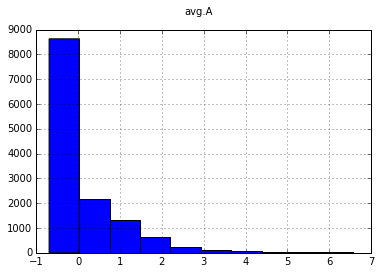

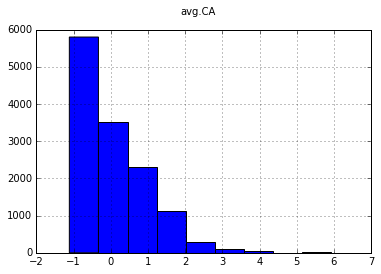

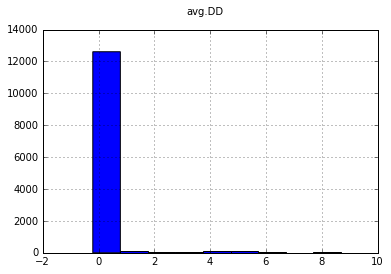

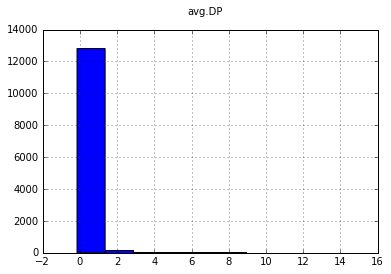

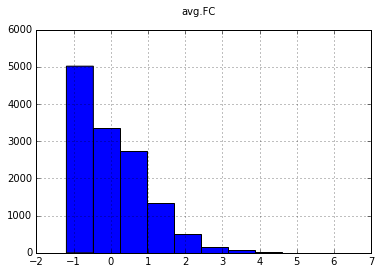

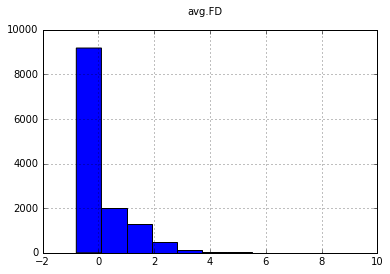

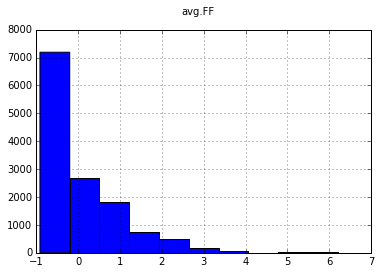

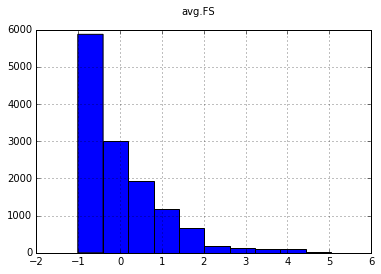

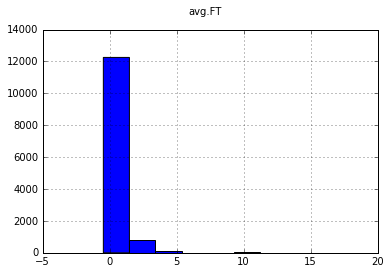

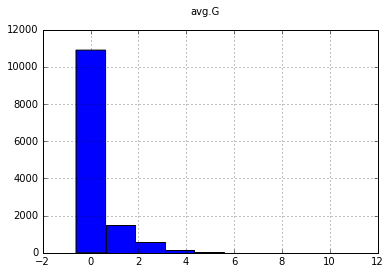

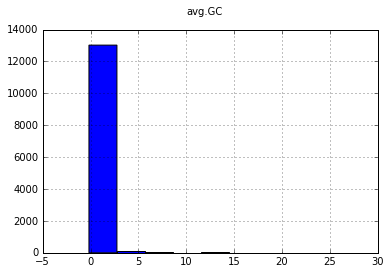

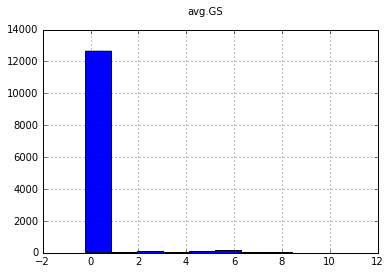

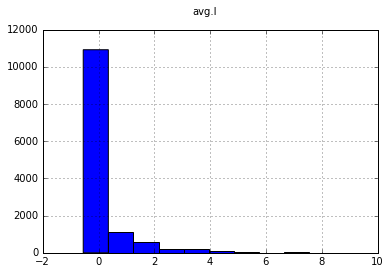

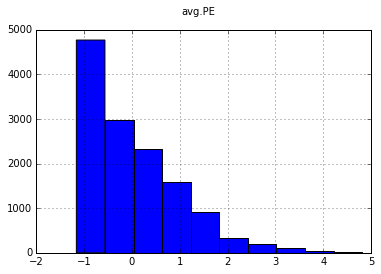

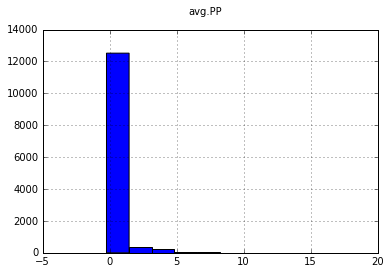

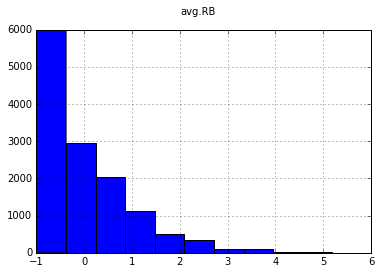

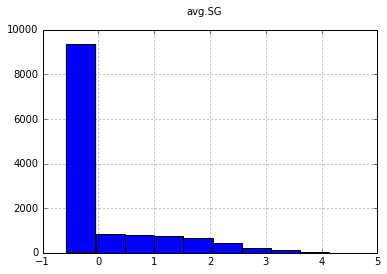

In [20]:
for dim in dimensions:
    plt.figure()
    plt.suptitle(dim)
#     print(dim)
    df_all[dim].hist()